In [178]:
import pandas as pd
from collections import defaultdict
import sklearn
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input
from keras.layers.merge import Concatenate



In [179]:
df = pd.read_csv('book_data.csv') # loading dataset
df

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
...,...,...,...,...,...,...,...,...,...,...,...,...
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...
54298,Howard Megdal,NaN,NaN,Kindle Edition,NaN,NaN,3.66,32,3,"Wilpon's Folly - The Story of a Man, His Fortu...",Sports|Baseball|Abandoned,https://images.gr-assets.com/books/1394277097l...
54299,Mimi Baird|Eve Claxton,"Soon to be a major motion picture, from Brad P...",NaN,Hardcover,9.7808E+12,272 pages,3.82,867,187,He Wanted the Moon: The Madness and Medical Ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...


In [180]:
df['new_genres'] = df['genres'].str.split('|') # splitting the genres of a books
df

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,new_genres
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,"[Young Adult, Fiction, Science Fiction, Dystop..."
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,"[Fantasy, Young Adult, Fiction]"
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,"[Classics, Fiction, Historical, Historical Fic..."
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,"[Classics, Fiction, Romance]"
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,"[Young Adult, Fantasy, Romance, Paranormal, Va..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,"[Sports, Baseball, Sports and Games, Sports, N..."
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,"[Nonfiction, Sports and Games, Sports]"
54298,Howard Megdal,NaN,NaN,Kindle Edition,NaN,NaN,3.66,32,3,"Wilpon's Folly - The Story of a Man, His Fortu...",Sports|Baseball|Abandoned,https://images.gr-assets.com/books/1394277097l...,"[Sports, Baseball, Abandoned]"
54299,Mimi Baird|Eve Claxton,"Soon to be a major motion picture, from Brad P...",NaN,Hardcover,9.7808E+12,272 pages,3.82,867,187,He Wanted the Moon: The Madness and Medical Ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...,"[Nonfiction, Autobiography, Memoir, Biography,..."


In [181]:
new_genres_list = [i for i in df['new_genres']] # creating a list of genres
new_genres_list

[['Young Adult',
  'Fiction',
  'Science Fiction',
  'Dystopia',
  'Fantasy',
  'Science Fiction'],
 ['Fantasy', 'Young Adult', 'Fiction'],
 ['Classics',
  'Fiction',
  'Historical',
  'Historical Fiction',
  'Academic',
  'School'],
 ['Classics', 'Fiction', 'Romance'],
 ['Young Adult',
  'Fantasy',
  'Romance',
  'Paranormal',
  'Vampires',
  'Fiction',
  'Fantasy',
  'Paranormal'],
 ['Historical', 'Historical Fiction', 'Fiction', 'Young Adult'],
 ['Fantasy', 'Classics', 'Fiction', 'Young Adult', 'Childrens'],
 ['Classics',
  'Fiction',
  'Science Fiction',
  'Dystopia',
  'Fantasy',
  'Literature',
  'Academic',
  'School',
  'Politics',
  'Science Fiction',
  'Novels',
  'Academic',
  'Read For School'],
 ['Classics',
  'Historical',
  'Historical Fiction',
  'Fiction',
  'Romance',
  'Historical'],
 ['Fantasy', 'Fiction', 'Classics'],
 ['Young Adult', 'Fiction', 'Romance', 'Contemporary'],
 ['Science Fiction', 'Fiction', 'Humor', 'Fantasy', 'Classics'],
 ['Childrens', 'Childrens', 

In [182]:
summa = 0

# checking if there are no genres which are only one float

for i in new_genres_list:
    if type(i) is not float:
        if len(i) < 1:
            summa += 1
        
        
summa

0

In [183]:
df2=df.dropna(subset=['book_desc','new_genres']) # dropping rows which consist missing data from book_desc and new_genres
df2
    

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,new_genres
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,"[Young Adult, Fiction, Science Fiction, Dystop..."
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,"[Fantasy, Young Adult, Fiction]"
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,"[Classics, Fiction, Historical, Historical Fic..."
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,"[Classics, Fiction, Romance]"
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,"[Young Adult, Fantasy, Romance, Paranormal, Va..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54295,Avi Steinberg,Avi Steinberg is stumped. After defecting from...,NaN,Hardcover,9.78039E+12,399 pages,3.51,3717,661,Running the Books: The Adventures of an Accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...,"[Nonfiction, Autobiography, Memoir, Biography,..."
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,"[Sports, Baseball, Sports and Games, Sports, N..."
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,"[Nonfiction, Sports and Games, Sports]"
54299,Mimi Baird|Eve Claxton,"Soon to be a major motion picture, from Brad P...",NaN,Hardcover,9.7808E+12,272 pages,3.82,867,187,He Wanted the Moon: The Madness and Medical Ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...,"[Nonfiction, Autobiography, Memoir, Biography,..."


In [184]:
new_genres_list = [i for i in df2['new_genres']]
new_list = []

for i in new_genres_list:
    for k in i:
        new_list.append(k)
        
len(new_list) # checking of how many there is a genres in our dataset

296576

In [185]:
new_set = set(new_list)
new_set # all available genres



{'10th Century',
 '11th Century',
 '12th Century',
 '13th Century',
 '14th Century',
 '15th Century',
 '16th Century',
 '17th Century',
 '18th Century',
 '1917',
 '19th Century',
 '1st Grade',
 '20th Century',
 '21st Century',
 '2nd Grade',
 '40k',
 'Abandoned',
 'Abuse',
 'Academia',
 'Academic',
 'Academics',
 'Action',
 'Activism',
 'Adaptations',
 'Adolescence',
 'Adoption',
 'Adult',
 'Adult Fiction',
 'Adventure',
 'Aeroplanes',
 'Africa',
 'African American',
 'African American Literature',
 'African American Romance',
 'African Literature',
 'Agriculture',
 'Aircraft',
 'Albanian Literature',
 'Alchemy',
 'Alcohol',
 'Algeria',
 'Algorithms',
 'Aliens',
 'Alternate History',
 'Alternative Medicine',
 'Amazon',
 'American',
 'American Civil War',
 'American Fiction',
 'American History',
 'American Revolution',
 'American Revolutionary War',
 'Americana',
 'Amish',
 'Amish Fiction',
 'Anarchism',
 'Ancient',
 'Ancient History',
 'Angels',
 'Angola',
 'Animal Fiction',
 'Animals'

In [186]:
len(new_set)

new_list_of_genres = list(new_set)

In [187]:
new_dict = {}

for i in df2['new_genres']:
    for k in i:
        if k in new_dict.keys():
            new_dict[k] += 1
        else:
            new_dict[k] = 0
new_dict # creating a dictionary which consist a kind of a genre (key) and the number of occurences of the specific genre (value)
    

{'Young Adult': 11250,
 'Fiction': 25735,
 'Science Fiction': 6779,
 'Dystopia': 1407,
 'Fantasy': 23582,
 'Classics': 6271,
 'Historical': 10788,
 'Historical Fiction': 6398,
 'Academic': 956,
 'School': 573,
 'Romance': 18635,
 'Paranormal': 7993,
 'Vampires': 1688,
 'Childrens': 5359,
 'Literature': 4515,
 'Politics': 1042,
 'Novels': 2478,
 'Read For School': 122,
 'Contemporary': 6038,
 'Humor': 2587,
 'Picture Books': 523,
 'Mystery': 7901,
 'Thriller': 3560,
 'Horror': 2554,
 'Gothic': 296,
 '19th Century': 279,
 'Classic Literature': 58,
 'European Literature': 2940,
 'British Literature': 543,
 'Plays': 664,
 'Drama': 590,
 'High School': 148,
 'Poetry': 1227,
 'Philosophy': 2010,
 'Spirituality': 870,
 'Inspirational': 234,
 'Adventure': 2349,
 'Self Help': 1026,
 'Cultural': 5182,
 'Russia': 535,
 'Russian Literature': 320,
 'Adult': 928,
 'American': 651,
 'Time Travel': 406,
 'Canada': 311,
 'Middle Grade': 1262,
 'Audiobook': 619,
 'Coming Of Age': 176,
 'Science Fiction 

In [188]:
new_dict = {k: v for k, v in sorted(new_dict.items(), key=lambda item: item[1], reverse = True)} #sorting species by the number of their occurrence 
new_dict 

{'Fiction': 25735,
 'Fantasy': 23582,
 'Romance': 18635,
 'Young Adult': 11250,
 'Historical': 10788,
 'Paranormal': 7993,
 'Mystery': 7901,
 'Nonfiction': 7597,
 'Science Fiction': 6779,
 'Historical Fiction': 6398,
 'Classics': 6271,
 'Contemporary': 6038,
 'Childrens': 5359,
 'Cultural': 5182,
 'Literature': 4515,
 'Thriller': 3560,
 'Sequential Art': 3553,
 'European Literature': 2940,
 'Religion': 2934,
 'History': 2786,
 'Biography': 2719,
 'Humor': 2587,
 'Horror': 2554,
 'Novels': 2478,
 'Adventure': 2349,
 'Crime': 2216,
 'Contemporary Romance': 2179,
 'Autobiography': 2050,
 'Philosophy': 2010,
 'War': 1975,
 'Christian': 1814,
 'Short Stories': 1807,
 'Paranormal Romance': 1701,
 'Vampires': 1688,
 'Womens Fiction': 1674,
 'Comics': 1667,
 'Memoir': 1644,
 'Chick Lit': 1638,
 'Erotica': 1610,
 'Urban Fantasy': 1523,
 'Science': 1519,
 'New Adult': 1465,
 'Graphic Novels': 1436,
 'Adult Fiction': 1419,
 'Dystopia': 1407,
 'Magic': 1392,
 'Middle Grade': 1262,
 'Poetry': 1227,

In [189]:

# Creating a list that includes the 5 most common genres from which we will create the model
a = 0
my_dict = {}
for k, v in new_dict.items():
    a += 1
    if a <= 10:
        my_dict[k] = v
    else:
        break
        
my_dict

list_of_genres = []

for k, v in my_dict.items():
    list_of_genres.append(k)
    
list_of_genres
    

['Fiction',
 'Fantasy',
 'Romance',
 'Young Adult',
 'Historical',
 'Paranormal',
 'Mystery',
 'Nonfiction',
 'Science Fiction',
 'Historical Fiction']

In [190]:
# Creating a dictionary to filter the dataframe where there are only the most common genres

b = 0
a = 0
new_list = []
for i in df2['new_genres']:
    d = 0
    a += 1
    for k in i:
        d += 1
        if k in list_of_genres:
            new_list.append(True)
            break
        elif d == len(i) and k not in list_of_genres:
            new_list.append(False)
        else:
            continue
            
Counter(new_list)

Counter({True: 46687, False: 3490})

In [191]:

# Filtering the dataframe where there are only the most common genres
df = df2[new_list]
df

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,new_genres
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,"[Young Adult, Fiction, Science Fiction, Dystop..."
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,"[Fantasy, Young Adult, Fiction]"
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,"[Classics, Fiction, Historical, Historical Fic..."
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,"[Classics, Fiction, Romance]"
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,"[Young Adult, Fantasy, Romance, Paranormal, Va..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,Siri Hustvedt,"A brilliant, provocative novel about an artist...",First Simon & Schuster hardcover edition,Hardcover,9.78148E+12,368 pages,3.67,5827,816,The Blazing World,Fiction|Art|Feminism|Contemporary|Literary Fic...,https://images.gr-assets.com/books/1418103958l...,"[Fiction, Art, Feminism, Contemporary, Literar..."
54295,Avi Steinberg,Avi Steinberg is stumped. After defecting from...,NaN,Hardcover,9.78039E+12,399 pages,3.51,3717,661,Running the Books: The Adventures of an Accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...,"[Nonfiction, Autobiography, Memoir, Biography,..."
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,"[Sports, Baseball, Sports and Games, Sports, N..."
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,"[Nonfiction, Sports and Games, Sports]"


In [192]:
# Creating a list where there are only most popular genres and adding it to a column in our dataframe


a = 0
most_popular_genres = []
for i in df['new_genres']:
    a += 1
    new_list = []
    for k in i:
        if k in list_of_genres:
            new_list.append(k)
        else:
            continue
    most_popular_genres.insert(a, new_list)
most_popular_genres

df['most_popular_genres'] = most_popular_genres
df




/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,new_genres,most_popular_genres
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,"[Young Adult, Fiction, Science Fiction, Dystop...","[Young Adult, Fiction, Science Fiction, Fantas..."
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,"[Fantasy, Young Adult, Fiction]","[Fantasy, Young Adult, Fiction]"
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,"[Classics, Fiction, Historical, Historical Fic...","[Fiction, Historical, Historical Fiction]"
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,"[Classics, Fiction, Romance]","[Fiction, Romance]"
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,"[Young Adult, Fantasy, Romance, Paranormal, Va...","[Young Adult, Fantasy, Romance, Paranormal, Fi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,Siri Hustvedt,"A brilliant, provocative novel about an artist...",First Simon & Schuster hardcover edition,Hardcover,9.78148E+12,368 pages,3.67,5827,816,The Blazing World,Fiction|Art|Feminism|Contemporary|Literary Fic...,https://images.gr-assets.com/books/1418103958l...,"[Fiction, Art, Feminism, Contemporary, Literar...",[Fiction]
54295,Avi Steinberg,Avi Steinberg is stumped. After defecting from...,NaN,Hardcover,9.78039E+12,399 pages,3.51,3717,661,Running the Books: The Adventures of an Accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...,"[Nonfiction, Autobiography, Memoir, Biography,...",[Nonfiction]
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,"[Sports, Baseball, Sports and Games, Sports, N...",[Nonfiction]
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,"[Nonfiction, Sports and Games, Sports]",[Nonfiction]


In [193]:
# Creating a set so that two genres are not repeated in one list for each book description


new_list = []
a = 0

for i in df['most_popular_genres']:
    a += 1
    new_set = set()
    for k in i:
        new_set.add(k)
    new_list.insert(a, new_set)
    
list_of_unique_genres = []

for i in new_list:
    list_of_unique_genres.append(list(i))
    
list_of_unique_genres

[['Fiction', 'Science Fiction', 'Fantasy', 'Young Adult'],
 ['Fiction', 'Fantasy', 'Young Adult'],
 ['Fiction', 'Historical Fiction', 'Historical'],
 ['Fiction', 'Romance'],
 ['Paranormal', 'Romance', 'Fiction', 'Young Adult', 'Fantasy'],
 ['Historical', 'Historical Fiction', 'Young Adult', 'Fiction'],
 ['Fiction', 'Fantasy', 'Young Adult'],
 ['Fiction', 'Science Fiction', 'Fantasy'],
 ['Historical', 'Historical Fiction', 'Fiction', 'Romance'],
 ['Fiction', 'Fantasy'],
 ['Fiction', 'Young Adult', 'Romance'],
 ['Fiction', 'Science Fiction', 'Fantasy'],
 ['Fiction'],
 ['Fiction', 'Romance'],
 ['Fiction', 'Mystery'],
 ['Fiction', 'Historical Fiction', 'Romance', 'Historical'],
 ['Fiction', 'Fantasy'],
 ['Fiction', 'Fantasy'],
 ['Fiction', 'Historical Fiction', 'Historical'],
 ['Fiction', 'Science Fiction', 'Fantasy', 'Young Adult'],
 ['Fiction', 'Historical Fiction', 'Historical', 'Romance'],
 ['Fiction', 'Young Adult', 'Romance'],
 ['Fiction', 'Young Adult'],
 ['Fiction', 'Fantasy'],
 ['

In [194]:
df['most_popular_genres_unique'] = list_of_unique_genres
df

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,new_genres,most_popular_genres,most_popular_genres_unique
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,"[Young Adult, Fiction, Science Fiction, Dystop...","[Young Adult, Fiction, Science Fiction, Fantas...","[Fiction, Science Fiction, Fantasy, Young Adult]"
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,"[Fantasy, Young Adult, Fiction]","[Fantasy, Young Adult, Fiction]","[Fiction, Fantasy, Young Adult]"
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,"[Classics, Fiction, Historical, Historical Fic...","[Fiction, Historical, Historical Fiction]","[Fiction, Historical Fiction, Historical]"
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,"[Classics, Fiction, Romance]","[Fiction, Romance]","[Fiction, Romance]"
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,"[Young Adult, Fantasy, Romance, Paranormal, Va...","[Young Adult, Fantasy, Romance, Paranormal, Fi...","[Paranormal, Romance, Fiction, Young Adult, Fa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,Siri Hustvedt,"A brilliant, provocative novel about an artist...",First Simon & Schuster hardcover edition,Hardcover,9.78148E+12,368 pages,3.67,5827,816,The Blazing World,Fiction|Art|Feminism|Contemporary|Literary Fic...,https://images.gr-assets.com/books/1418103958l...,"[Fiction, Art, Feminism, Contemporary, Literar...",[Fiction],[Fiction]
54295,Avi Steinberg,Avi Steinberg is stumped. After defecting from...,NaN,Hardcover,9.78039E+12,399 pages,3.51,3717,661,Running the Books: The Adventures of an Accide...,Nonfiction|Autobiography|Memoir|Biography|Writ...,https://images.gr-assets.com/books/1320533033l...,"[Nonfiction, Autobiography, Memoir, Biography,...",[Nonfiction],[Nonfiction]
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,"[Sports, Baseball, Sports and Games, Sports, N...",[Nonfiction],[Nonfiction]
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,"[Nonfiction, Sports and Games, Sports]",[Nonfiction],[Nonfiction]


In [195]:
# adding additional column in dataframe to which will contain integers denoting 1 when the fiction book genre is present and 0 when it is not present for a given book description

fiction_list = []

for i in df['most_popular_genres_unique']:
    if 'Fiction' in i:
        fiction_list.append(1)
    else:
        fiction_list.append(0)
        
df['fiction'] = fiction_list


/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [196]:
# adding additional column in dataframe to which will contain integers denoting 1 when the fantasy book genre is present and 0 when it is not present for a given book description

fantasy_list = []

for i in df['most_popular_genres_unique']:
    if 'Fantasy' in i:
        fantasy_list.append(1)
    else:
        fantasy_list.append(0)
        
df['fantasy'] = fantasy_list



/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [197]:
# adding additional column in dataframe to which will contain integers denoting 1 when the romance book genre is present and 0 when it is not present for a given book description


romance_list = []

for i in df['most_popular_genres_unique']:
    if 'Romance' in i:
        romance_list.append(1)
    else:
        romance_list.append(0)
        
df['romance'] = romance_list

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [198]:
# adding additional column in dataframe to which will contain integers denoting 1 when the young_adult book genre is present and 0 when it is not present for a given book description

young_adult = []

for i in df['most_popular_genres_unique']:
    if 'Young Adult' in i:
        young_adult.append(1)
    else:
        young_adult.append(0)
        
df['young_adult'] = young_adult



/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [199]:
# adding additional column in dataframe to which will contain integers denoting 1 when the history book genre is present and 0 when it is not present for a given book description

historical = []


for i in df['most_popular_genres_unique']:
    if 'Historical' in i:
        historical.append(1)
    else:
        historical.append(0)

df['historical'] = historical


/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [200]:
paranormal_list = []

for i in df['most_popular_genres_unique']:
    if 'Paranormal' in i:
        paranormal_list.append(1)
    else:
        paranormal_list.append(0)
        
df['paranormal'] = paranormal_list

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [201]:
mystery_list = []

for i in df['most_popular_genres_unique']:
    if 'Mystery' in i:
        mystery_list.append(1)
    else:
        mystery_list.append(0)
        
df['mystery'] = mystery_list

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [202]:
nonfiction_list = []

for i in df['most_popular_genres_unique']:
    if 'Nonfiction' in i:
        nonfiction_list.append(1)
    else:
        nonfiction_list.append(0)
        
df['nonfiction'] = nonfiction_list

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [203]:
science_fiction_list = []

for i in df['most_popular_genres_unique']:
    if 'Science Fiction' in i:
        science_fiction_list.append(1)
    else:
        science_fiction_list.append(0)
        
df['science_fiction'] = science_fiction_list

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [204]:
historical_fiction_list = []

for i in df['most_popular_genres_unique']:
    if 'Historical Fiction' in i:
        historical_fiction_list.append(1)
    else:
        historical_fiction_list.append(0)
        
df['historical_fiction'] = historical_fiction_list

/Users/maciej/opt/anaconda3/envs/machine/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [205]:
df

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,...,fiction,fantasy,romance,young_adult,historical,paranormal,mystery,nonfiction,science_fiction,historical_fiction
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,...,1,1,0,1,0,0,0,0,1,0
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,...,1,1,0,1,0,0,0,0,0,0
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,...,1,0,0,0,1,0,0,0,0,1
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,...,1,0,1,0,0,0,0,0,0,0
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,...,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54294,Siri Hustvedt,"A brilliant, provocative novel about an artist...",First Simon & Schuster hardcover edition,Hardcover,9.78148E+12,368 pages,3.67,5827,816,The Blazing World,...,1,0,0,0,0,0,0,0,0,0
54295,Avi Steinberg,Avi Steinberg is stumped. After defecting from...,NaN,Hardcover,9.78039E+12,399 pages,3.51,3717,661,Running the Books: The Adventures of an Accide...,...,0,0,0,0,0,0,0,1,0,0
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,9.78161E+12,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,...,0,0,0,0,0,0,0,1,0,0
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,9.78006E+12,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",...,0,0,0,0,0,0,0,1,0,0


In [206]:

# Filtering dataframe to have only book description and the most common genres as labels
my_df = df.loc[:,["book_desc","fiction","fantasy","romance","young_adult","historical","paranormal","mystery","nonfiction","science_fiction","historical_fiction"]]

my_df

,book_desc,fiction,fantasy,romance,young_adult,historical,paranormal,mystery,nonfiction,science_fiction,historical_fiction
0,Winning will make you famous. Losing means cer...,1,1,0,1,0,0,0,0,1,0
1,There is a door at the end of a silent corrido...,1,1,0,1,0,0,0,0,0,0
2,The unforgettable novel of a childhood in a sl...,1,0,0,0,1,0,0,0,0,1
3,«È cosa ormai risaputa che a uno scapolo in po...,1,0,1,0,0,0,0,0,0,0
4,About three things I was absolutely positive.F...,1,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54294,"A brilliant, provocative novel about an artist...",1,0,0,0,0,0,0,0,0,0
54295,Avi Steinberg is stumped. After defecting from...,0,0,0,0,0,0,0,1,0,0
54296,"In this fearless and half-crazy story, Howard ...",0,0,0,0,0,0,0,1,0,0
54297,From the icons of the game to the players who ...,0,0,0,0,0,0,0,1,0,0


In [207]:
# THis is an example of a book description

print(my_df["book_desc"][120])

Told in Kvothe's own voice, this is the tale of the magically gifted young man who grows to be the most notorious wizard his world has ever seen. The intimate narrative of his childhood in a troupe of traveling players, his years spent as a near-feral orphan in a crime-ridden city, his daringly brazen yet successful bid to enter a legendary school of magic, and his life as a fugitive after the murder of a king form a gripping coming-of-age story unrivaled in recent literature. A high-action story written with a poet's hand, The Name of the Wind is a masterpiece that will transport readers into the body and mind of a wizard.


In [208]:
# Creating a labels for every book description
genre_labels = my_df[['fiction','fantasy','romance','young_adult',"historical","paranormal","mystery","nonfiction","science_fiction","historical_fiction"]]
genre_labels.head()

,fiction,fantasy,romance,young_adult,historical,paranormal,mystery,nonfiction,science_fiction,historical_fiction
0,1,1,0,1,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0


<AxesSubplot:>

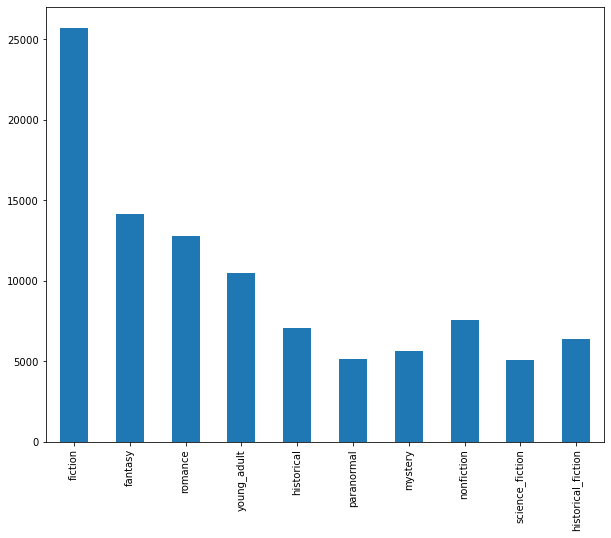

In [209]:
# ploting  the frequency of occurence the genres of a books


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

genre_labels.sum(axis=0).plot.bar()

In [210]:


def preprocess_text(sen):
    '''
    Removing the puncuations, single characters and multiple spaces in sentences

            Parameters:
                    sen (str): some sentence

            Returns:
                    sentence (str): cleaner sentence
    '''
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [211]:
# BAG OF WORDS MODEL

In [212]:

# assigning data and label to X and Y variables

data = []
sentences = list(my_df["book_desc"])
for sen in sentences:
    data.append(preprocess_text(sen))

Y = genre_labels.values


In [213]:
# transforming sentences (book descriptions) to a numbers using CountVectorizer
# We do not need to create a labels for genres because there are represented in values 0 and 1 as one hot encoders

vectorizer = CountVectorizer(min_df = 5, ngram_range = (1,3)).fit(data)
X = vectorizer.transform(data)

In [215]:
# creating testing and training datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [216]:

# Creating a model with hidden layer using adam optimizer and activation functions relu (hidden layer)and sigmoid (output layer)

model = Sequential()
model.add(Dense(5, input_dim=X.shape[1], activation='relu'))
model.add(Dense(Y.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

model.predict(X) # The prediction of a model

array([[0.4988149 , 0.5051468 , 0.5038174 , ..., 0.49763423, 0.5041073 ,
        0.5050403 ],
       [0.5020409 , 0.51550996, 0.49733365, ..., 0.49610937, 0.4976109 ,
        0.5081373 ],
       [0.5023628 , 0.50795925, 0.5090956 , ..., 0.50005156, 0.5041379 ,
        0.51418936],
       ...,
       [0.5113007 , 0.5356181 , 0.4860197 , ..., 0.49291813, 0.48772144,
        0.51575065],
       [0.50279707, 0.5320467 , 0.49617723, ..., 0.49155146, 0.4965211 ,
        0.51746285],
       [0.50812376, 0.5356304 , 0.48979315, ..., 0.49201804, 0.49098325,
        0.51717895]], dtype=float32)

In [217]:

mymodel = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2) # Training a model

Train on 29879 samples, validate on 7470 samples
Epoch 1/10
29879/29879 [==============================] - 33s 1ms/step - loss: 0.4380 - accuracy: 0.8202 - val_loss: 0.3534 - val_accuracy: 0.8598
Epoch 2/10
29879/29879 [==============================] - 35s 1ms/step - loss: 0.2688 - accuracy: 0.8936 - val_loss: 0.3218 - val_accuracy: 0.8710
Epoch 3/10
29879/29879 [==============================] - 36s 1ms/step - loss: 0.1806 - accuracy: 0.9335 - val_loss: 0.3154 - val_accuracy: 0.8819
Epoch 4/10
29879/29879 [==============================] - 34s 1ms/step - loss: 0.1278 - accuracy: 0.9570 - val_loss: 0.3430 - val_accuracy: 0.8833
Epoch 5/10
29879/29879 [==============================] - 34s 1ms/step - loss: 0.1020 - accuracy: 0.9671 - val_loss: 0.3694 - val_accuracy: 0.8841
Epoch 6/10
29879/29879 [==============================] - 33s 1ms/step - loss: 0.0902 - accuracy: 0.9719 - val_loss: 0.4062 - val_accuracy: 0.8844
Epoch 7/10
29879/29879 [==============================] - 34s 1ms/ste

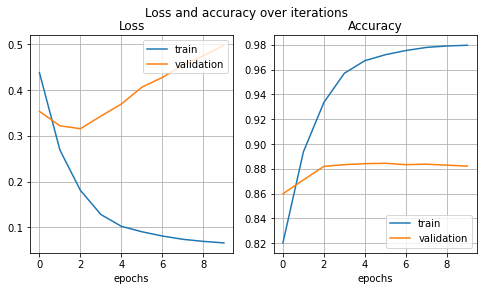

In [218]:


# Plotting the loss, validation loss, accuracy and validation accuracy values for our model

def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize = (8,4))
    fig.suptitle("Loss and accuracy over iterations")
    
    # add subplots(nrows, ncolumns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel = 'epochs', title = 'Loss')
    ax.legend(['train', 'validation'], loc = 'upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel = 'epochs', title = 'Accuracy')
    ax.legend(['train', 'validation'], loc = 'lower right')
    
plot_loss_accuracy(mymodel.history['loss'],
                   mymodel.history['val_loss'],
                   mymodel.history['accuracy'],
                   mymodel.history['val_accuracy'])


def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize = (8,4))
    fig.suptitle("Loss and accuracy over iterations")
    
    ax = fig.add_subplot(1,2,1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.gird(True)
    ax.set(xlabel = 'epochs', title= 'loss')
    ax.legend(['train', 'validation'], loc = 'upper right')

In [219]:
# The accuracy value and loss value indicating how the model copes with a test data

loss, accuracy = model.evaluate(X_test, Y_test, verbose = 0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.4978546801229237
Test accuracy: 0.8808416128158569


In [224]:

# How the model predicted the sentence 'Book describes a man who went to the moon. He was looking for an adventure in his life.I was also looking for an adventure - wish me look.'




t = vectorizer.transform(['Book describes a man who went to the moon. He was looking for an adventure in his life. I was also looking for an adventure - wish me look.'])
res = model.predict(t)


d = res.tolist()


list_of_predictions = []

for i in d:
    for c in i:
        list_of_predictions.append(c)
        
list_of_predictions
a = 0

for i in list_of_predictions:
    a += 1
    if i > 0.5:
        print(list_of_genres[a])

Romance


TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'csr_matrix'.

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=  (0, 21597)	10.470676941032483
  (0, 22051)	10.470676941032483
  (0, 43257)	10.470676941032483
  (0, 49242)	10.470676941032483
  (0, 49652)	10.470676941032483
  (0, 54747)	10.182994868580701
  (0, 57908)	9.777529760472538
  (0, 1075)	10.470676941032483
  (0, 17151)	10.182994868580701
  (0, 13051)	9.777529760472538
  (0, 50604)	10.182994868580701
  (0, 59096)	10.470676941032483
  (0, 32494)	9.777529760472538
  (0, 33354)	9.623379080645279
  (0, 17044)	10.470676941032483
  (0, 3127)	9.623379080645279
  (0, 2250)	9.372064652364374
  (0, 46093)	10.182994868580701
  (0, 48318)	9.266704136706547
  (0, 64316)	9.777529760472538
  (0, 7927)	9.777529760472538
  (0, 70317)	9.959851317266493
  (0, 39011)	10.470676941032483
  (0, 74717)	9.623379080645279
  (0, 22650)	9.623379080645279
  :	:
  (31135, 41184)	4.002460750492261
  (31135, 75972)	3.0571085801079
  (31135, 75949)	2.602295116356139
  (31135, 23143)	3.92150318425966
  (31135, 76688)	2.360950860395083
  (31135, 47701)	2.59860296116561
  (31135, 34320)	2.3386561544566478
  (31135, 69133)	2.720923534758046
  (31135, 9768)	2.3129244194131307
  (31135, 76065)	3.4494491500454085
  (31135, 15873)	3.4127790036206265
  (31135, 48816)	1.819011133414972
  (31135, 68923)	5.264840427278612
  (31135, 76087)	4.209185256711441
  (31135, 34894)	1.864069705788107
  (31135, 69130)	4.630917596512271
  (31135, 69244)	3.566185330097401
  (31135, 62598)	1.950820632196762
  (31135, 77401)	2.982196910904688
  (31135, 75969)	3.4163873649463854
  (31135, 45622)	2.930586620887158
  (31135, 2483)	1.8645575404218442
  (31135, 9361)	4.202248489336073
  (31135, 26320)	1.8914483586967932
  (31135, 16116)	3.361342288651977

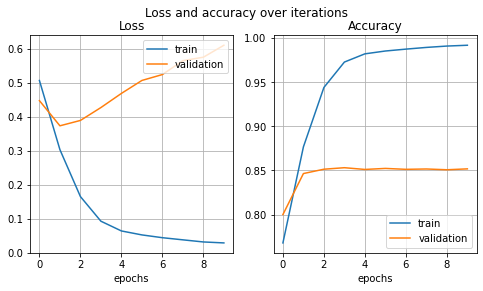

ValueError: Input arrays should have the same number of samples as target arrays. Found 38920 input samples and 31136 target samples.